## N-body gravitasjonssimulasjon
#### Innholdsliste
- Matematikken bak det
- Bilder med litt forklaringer eller noe sånt
- Hele koden ( copy-pastet fra de andre .py filene i repositoriet )

#### Litt info
Det ble litt tull med imports i python cellene under, så jeg måtte splitte opp den originale koden
inn i flere mindre filer. Den originale koden ligger under "simulation.py" hvis du vil ta en titt der.
 (resultatet av koden er helt lik som det vi får her, bortsett fra at alt ligger på ett sted)

Først ville jeg ha en real-time n-body physics simulator ( i c# / c++),
noe som kanskje var en litt stor ambisjon. Til slutt endte jeg opp med å gjøre det
i python, men i stedet for real-time simulasjon ble det plotting.
Under prosjektet fant jeg ut hvor kult pyplot er når du bruker den i 3d.
MEN, jeg har også funnet ut at Jupyter ikke kan vise gifs live.
I.e. du kan ikke generere og spille av en animasjon med matplotlib
(noe som er litt synd siden jeg la til en funksjon som animerer plottet).

### Matematikken/fysikken bak det
Ok så først og fremst skal jeg si litt om hvordan fysikken bak dette funker:
Gitt en planet, dens masse, startfart og -posisjon,
skal programmet forutsi hvor denne planeten kommer til å ende opp etter en viss
mengde loops og/eller etter en viss tid. Dette gjør vi gjennom
Newtons lov om universell tyngdekraft (det navnet er kanskje litt direkteoversatt fra engelsk (: )

Før jeg viser utregningene vi gjør i programmet skal jeg bare vise litt om hvordan fysikken
går:

- Posisjon er et sted (en posisjonsvektor) i rommet.
- Fart er endring av posisjon per sekund.
- Akselerasjon er endring av farten, også per sekund.

Hvis vi skal finne den nye posisjonen, må vi ta den gamle og plusse på farten den hadde ganget
 med tiden som har passert. Dette kan være sekunder, timer, dager, måneder, etc.
 Jo kortere tid, jo mer nøyaktig, men avstanden vi beveger oss er kortere.
 I simulasjonen kalles denne tiden timeStep.
For å få farten bruker jeg $v = v_0 + a\times t$, der t igjen er tiden som har passert.
Akselerasjonen finner vi gjennom formelen $F=m\times a \Rightarrow a = \frac{F}{m}$.
For å så få kraften F, bruker vi $F=\frac{G\times m_1 \times m_2}{r^2}$

Uansett, så må dette regnes ut for alle andre planeter i systemet vårt,
der vi legger sammen akselerasjonene.
Siden jeg bruker vektorer blir dette fryktelig enkelt, siden formelene blir nesten det samme.
Her er det vektorformen:
- $\vec{p_{ny}} = \vec{p} + \vec{v}\times tid$.
- $\vec{v} = \vec{a}\times tid$
- $\vec{a} = \frac{\vec{F}}{m_1}$
- $\vec{F} = \frac{\vec{d} \times G \times m_1 \times m_2}{r^2}$
- $\vec{d} = \frac{\vec{p_2} - \vec{p_1}}{|\vec{p_2} - \vec{p_1}|}$

Over er p posisjon, v fart, a akselerasjon, f kraft og d er den normaliserte vektoren mellom
posisjonen til planet 1 og planet 2 (retningsvektor). r er avstanden mellom de to planetene
(lengden til vektoren mellom de to planetene)

#### Litt om algoritmen
Algoritmen i seg selv kalles Euler-Cromer-metoden og sies å være den enkleste integrerende
banesimulasjons-algoritmen.

Denne metoden holder banene noe presise over lengre tid men
anses som unøyaktig siden den ikke tar fullstendig hensyn til
energien planetene har (kinetisk og potensiell). I.e. kinetisk energi kommer an på farten
til planeten og potensiell kommer an på avstanden planeten har fra sentrum av banen.
Når noe går i bane skal energien alltid være konstant.
(Høy potensiell $\Rightarrow$ lav kinetisk $\Rightarrow$ lav fart)
For denne simulasjonen føler jeg dette er irrelevant siden jeg bare ville at programmet
skulle funke (det tok ganske mange forsøk).

I tillegg, kommer feil 100% naturlig med Eulers metode. Jo lenger man prøver å spå en
funksjon, jo større feil får man. På begynnelsen er Eulermetoden ganske nøyaktig, men så
ser man etter veldig mange iterasjoner at den begynner å gjøre litt feil, fordi størrelsen
på feilene øker med hver iterasjon, siden vi bruker forrige iterasjon som nytt startpunkt.

Andre metoder som kan funke litt bedre er Runge-Kutta-metoden.
Jeg har ikke tittet fryktelig mye på det, men det virker som at det
er en av de mest nøyaktige integrasjonsmetodene folk har funnet på.
Jeg leste også at man kan få bedre resultater av å implementere
Einsteins relativitetsteori, men det er litt out of my league.

### Bilder og stuff
Aller først ville jeg lage hele greia i C#.
Dette gikk dårlig siden jeg brukte Unity, som bare bruker 32-bit floats.
Uansett hvordan jeg prøvde å skalere ned verdiene mine endte jeg opp med unøyaktige baner og
evt. float precision errors. Her er et par bilder av hva jeg fikk til i C#.

![weird orbit](img/enPeriode.png)
![atommodell?](img/kortSimulering.png)
![weird orbit](img/langSimulering.png)

Over ser vi altså hvordan banen til en liten planet(med en egen måne) utviklet seg over tid.
Grunnen til at den lagde dette mønsteret tror jeg kommer av float precision errors, siden
programmet jeg lagde i python kjører basically samme kode.
(mønsteret er fortsatt sykt kult da :D)

#### Bilder fra Python
Uansett, innså jeg at jeg egentlig måtte begynne å bruke rendering-triks
for å få ting til å *se* ekte ut,
i stedet for å faktisk lage en kul og (nesten) realistisk simulasjon.
Så her er noen bilder etter at jeg gjorde akkurat det samme i python:

![elliptical orbit](img/mars-elliptical-orbit.png)
På bildet over ser vi den første elliptiske banen dette programmet klarte å kalkulere.
Det var et stort øyeblikk :)

Under er hele solsystemet simulert. I midten ser vi en tett konsentrasjon av farger,
som egentlig kommer av unøyaktigheter med Eulers metode. Her har vi altså simulert sånn 165
år som gjør at de små, indre planetene fullfører mange baner. I tillegg blir de påvirket
av de store planetene i systemet, som hele tiden degraderer banene til de mindre planetene.
Dette er altså en feil pga. unøyaktighet,
siden banene ikke ville blitt påvirket til en så stor grad.

![fult solsystem](img/fullSolarSystem.png)

#### Under kommer all koden. Enjoy the spaghetti :)
Håper det går greit at alle kommentarene er på engelsk

In [16]:
# dette er copy pastet fra vector3class.py som brukes for vektormatte:
import math


# This bad boy is super useful.
class Vector3:
    def __init__(self, x, y, z=0):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vector3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vector3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __truediv__(self, scalar):
        if scalar == 0: print("Vector division by zero.")
        return Vector3(self.x/scalar, self.y/scalar, self.z/scalar)

    def __mul__(self, scalar):
        return Vector3(self.x*scalar, self.y*scalar, self.z*scalar)

    def Magnitude(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)

    def Normalize(self):
        return self / self.Magnitude()

    def __str__(self):
        return str(self.x) + ", " + str(self.y) + ", " + str(self.z)

#### Generelle klasser jeg bruker til å håndtere data:

In [17]:
from vector3class import *

# ___CLASSES___ #

# Basically planets. Can possibly be other stuff if we want to. (e.g. asteroids)
# Note that we don't track size and such (for now)
class Body:
    def __init__(self, position, velocity=Vector3(0,0), mass=0.0, name="unknown"):
        self.position = position
        self.velocity = velocity
        self.mass = mass
        self.name = name


# Holds the actual data to be plotted, with a label attached so we know what it is.
# This is really just because I think dictionaries and lists can become quite messy sometimes.
# Also, classes are cool :)
class BodyData:
    def __init__(self, label, positions = []):
        self.positions = positions  # Holds vector3's
        self.label = label

    def __str__(self):
        return "Name: " + self.label + ", " + str(self.positions)

#### Selve simulasjonskoden:

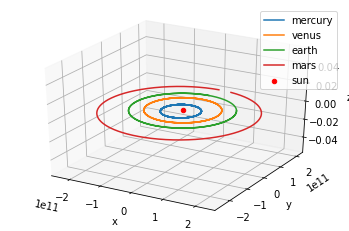

In [18]:
# Den faktiske simulasjonskoden:

from vector3class import *
from genericClasses import *

# "___SOMETHING SOMETHING___" is just header comments to mark sections.

# ___THE PHYSICS___ #

# F = G * m1 * m1 / r^2
# a = F / m1
def UpdateAcceleration(body, objectList, timeStep):
    G = 6.674E-11

    acceleration = Vector3(0,0,0)
    for otherBody in objectList:
        if otherBody != body:
            distance = otherBody.position - body.position
            unitVector = distance.Normalize()
            r = distance.Magnitude()
            acceleration += unitVector * G * otherBody.mass / r ** 2
    return acceleration


# v = a * t
def UpdatePosition(body, objectList, timeStep=1):
    # Multiply by time squared to get final and longest distance possibly traveled in x amount of time.
    body.velocity += UpdateAcceleration(body, objectList, timeStep) * timeStep
    body.position += body.velocity * timeStep


# This is the main loop that stores our points.
def Simulate(objectList, iterations=100, timeStep=1):
    orbits = []
    for body in objectList:
        orbits.append(BodyData(body.name, [body.position]))

    for iteration in range(iterations):
        for index, body in enumerate(objectList):
            UpdatePosition(body, objectList, timeStep)
            orbits[index].positions.append(body.position)

    return orbits

# ___THE PLOTTING___ #
# We make the graphs here :)
from matplotlib import pyplot as plt


# Plots the actual data.
# *Slaps roof of function* "This bad boy can fit so many cool graphs in it"
# also it can do rotations and stuff.
def PlotTheData(systemData, rotate=True, zdir="z"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    axisRange = 0

    # Each bodyData contains a name and a list of vectors3's.
    for bodyData in systemData:
        positions = bodyData.positions
        xValues = []
        yValues = []
        zValues = []
        for vector in positions:
            xValues.append(vector.x)
            yValues.append(vector.y)
            zValues.append(vector.z)

        # Used to stretch the axes so they are the same length.
        largestPositionValue = max([max(xValues), abs(min(xValues)),
                                    max(yValues), abs(min(yValues)),
                                    max(zValues), abs(min(zValues))])
        if axisRange < largestPositionValue: axisRange = largestPositionValue

        # The centre of the system is usually the first object in the list and may not move much.
        # Therefore we make it a dot.
        if bodyData is systemData[0]:
            ax.scatter(xValues[0], yValues[0], zValues[0], label=bodyData.label, zdir=zdir, color="r")
        else:
            ax.plot(xValues, yValues, zValues, label=bodyData.label, zdir=zdir)

    # These lines just name the axes. Doesn't account for the occasional run where I swap the z direction.
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()

    # Here I set the axis ranges.
    #ax.set_xlim(-axisRange,axisRange)
    #ax.set_ylim(-axisRange,axisRange)
    #ax.set_zlim(-axisRange,axisRange)

    # This part rotates the thing around for a while.
    if rotate:
        rotatePlot(ax)

    plt.show()  # Shows interactive figure until we exit.

# Rotates the plot (doesn't work in the notebook version)
def rotatePlot(ax):
    framePause = 1 / 60**2
    for loopAmount in range(2):
        # Rotates it to view from top.
        for angle in range(10, 90):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)
        # Rotates it down.
        for angle in range(90, -30, -1):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)
        # Rotates it back up again so we can loop.
        for angle in range(-30, 10):
            ax.view_init(angle, 45)
            plt.draw()
            plt.pause(framePause)


# ___THE SIMULATION PART___ #
# __PRESET SYSTEM CONFIGURATIONS__ #

# https://nssdc.gsfc.nasa.gov/planetary/factsheet/
# Solar System:
sun = Body(position=Vector3(0,0),
           velocity=Vector3(0,0),
           mass=1.989E30,
           name="sun")
mercury = Body(position=Vector3(0,46.00e+9),
            velocity=Vector3(-58980,0),
            mass=3.3011E+23,
            name="mercury")
venus = Body(position=Vector3(0,107.48e+9),
            velocity=Vector3(-35260,0),
            mass=4.87e+24,
            name="venus")
earth = Body(position=Vector3(0,147098074e+3),
             velocity=Vector3(-30290,0),
             mass=5.97e24,
             name="earth")
mars = Body(position=Vector3(0,206.7e+9),
            velocity=Vector3(-26500,0),
            mass=6.39e+23,
            name="mars")

solarSystem = [sun, mercury, venus, earth, mars]

# __Safe-to-touch data and stuff__ #
# More iterations means more time to compute.
# Larger timeStep means less time to compute but more inaccuracy.
# timeStep is basically just changing the time unit in our physical formulas from
# seconds to something else (e.g. like hours or days).
bodiesInSystem = solarSystem
iterations = 669*24
timeStep = 60*60
dataToPlot = Simulate(bodiesInSystem, iterations, timeStep)
PlotTheData(dataToPlot, False, "z")
